In [1]:
import tensorflow as tf
import numpy as np
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from utils import fit_plot, get_PU_labels


from multilayer_perceptron import MultilayerPerceptron
from pu_learning import (
    ClassDepLossMultilayerPerceptron,
    HardBoostrappingMultilayerPerceptron
)

In [2]:
# Network Parameters
n_input = 2
n_classes = 2

In [3]:
X, y = datasets.make_moons(n_samples=800, noise=0.2, random_state=0)
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=.5, random_state=42)
Y_train = np.eye(n_classes)[y_train]
print(X_train.shape)
print(Y_train.shape)

(400, 2)
(400, 2)


# Multilayer Perceptron without PU

('Epoch:', '0001', 'cost=', '0.683828622')
('Epoch:', '0006', 'cost=', '0.569347277')
('Epoch:', '0011', 'cost=', '0.568953186')
('Epoch:', '0016', 'cost=', '0.568141118')
('Epoch:', '0021', 'cost=', '0.561561316')
('Epoch:', '0026', 'cost=', '0.546271265')
('Epoch:', '0031', 'cost=', '0.530688986')
('Epoch:', '0036', 'cost=', '0.524243593')
('Epoch:', '0041', 'cost=', '0.523005247')
('Epoch:', '0046', 'cost=', '0.516186163')
('Epoch:', '0051', 'cost=', '0.515930012')
('Epoch:', '0056', 'cost=', '0.516317666')
('Epoch:', '0061', 'cost=', '0.516000196')
('Epoch:', '0066', 'cost=', '0.516009152')
('Epoch:', '0071', 'cost=', '0.514453396')
('Epoch:', '0076', 'cost=', '0.514352337')
('Epoch:', '0081', 'cost=', '0.514688343')
('Epoch:', '0086', 'cost=', '0.516193613')
('Epoch:', '0091', 'cost=', '0.514604747')
('Epoch:', '0096', 'cost=', '0.513747901')


<module 'matplotlib.pyplot' from '/usr/local/lib/python2.7/dist-packages/matplotlib/pyplot.pyc'>

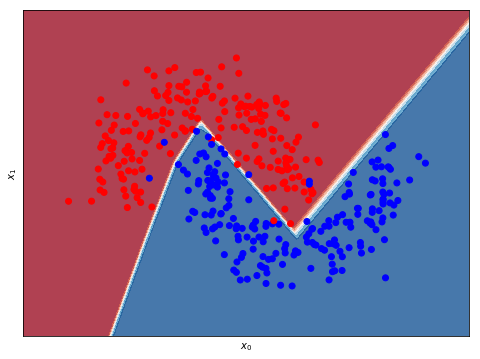

In [4]:
mp = MultilayerPerceptron(n_input=n_input,
                          n_classes=n_classes,
                          n_hiddens=[8, 8],
                          learning_rate=5e-2,
                          regularization=0,
                          training_epochs=100,
                          verbose=True)
fit_plot(X_train, Y_train, mp)

# PU setup

In [5]:
Y_train_pu = get_PU_labels(Y_train, random_seed=42)

### Normal

('Epoch:', '0001', 'cost=', '0.654250070')
('Epoch:', '0006', 'cost=', '0.620704368')
('Epoch:', '0011', 'cost=', '0.620704427')
('Epoch:', '0016', 'cost=', '0.620704442')
('Epoch:', '0021', 'cost=', '0.620704427')
('Epoch:', '0026', 'cost=', '0.620704398')
('Epoch:', '0031', 'cost=', '0.620704383')
('Epoch:', '0036', 'cost=', '0.620704442')
('Epoch:', '0041', 'cost=', '0.620704398')
('Epoch:', '0046', 'cost=', '0.620704427')
('Epoch:', '0051', 'cost=', '0.620704412')
('Epoch:', '0056', 'cost=', '0.620704412')
('Epoch:', '0061', 'cost=', '0.620704368')
('Epoch:', '0066', 'cost=', '0.620704442')
('Epoch:', '0071', 'cost=', '0.620704457')
('Epoch:', '0076', 'cost=', '0.620704412')
('Epoch:', '0081', 'cost=', '0.620704427')
('Epoch:', '0086', 'cost=', '0.620704412')
('Epoch:', '0091', 'cost=', '0.620704442')
('Epoch:', '0096', 'cost=', '0.620704383')


<module 'matplotlib.pyplot' from '/usr/local/lib/python2.7/dist-packages/matplotlib/pyplot.pyc'>

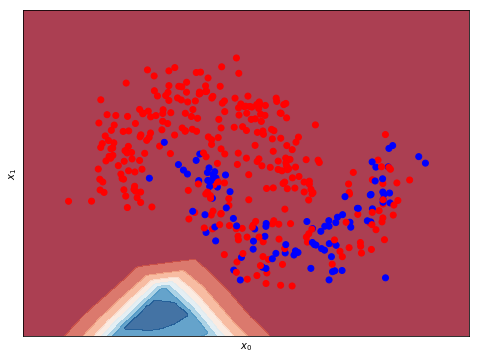

In [7]:
mp = MultilayerPerceptron(n_input=n_input,
                          n_classes=n_classes,
                          n_hiddens=[8, 8],
                          learning_rate=5e-2,
                          regularization=0,
                          training_epochs=100,
                          imbalanced=False,
                          verbose=True)
fit_plot(X_train, Y_train_pu.get(0.5), mp)

### Imbalance learning

('Using class_weight', array([ 1.        ,  3.23157895]))
('Epoch:', '0001', 'cost=', '0.806517184')
('Epoch:', '0006', 'cost=', '0.738294140')
('Epoch:', '0011', 'cost=', '0.735972598')
('Epoch:', '0016', 'cost=', '0.734635040')
('Epoch:', '0021', 'cost=', '0.733925119')
('Epoch:', '0026', 'cost=', '0.733995035')
('Epoch:', '0031', 'cost=', '0.738552585')
('Epoch:', '0036', 'cost=', '0.733790159')
('Epoch:', '0041', 'cost=', '0.736700311')
('Epoch:', '0046', 'cost=', '0.732250020')
('Epoch:', '0051', 'cost=', '0.736673012')
('Epoch:', '0056', 'cost=', '0.734413788')
('Epoch:', '0061', 'cost=', '0.732557863')
('Epoch:', '0066', 'cost=', '0.732911646')
('Epoch:', '0071', 'cost=', '0.735080555')
('Epoch:', '0076', 'cost=', '0.732762426')
('Epoch:', '0081', 'cost=', '0.734947458')
('Epoch:', '0086', 'cost=', '0.731319427')
('Epoch:', '0091', 'cost=', '0.731638551')
('Epoch:', '0096', 'cost=', '0.730448171')


<module 'matplotlib.pyplot' from '/usr/local/lib/python2.7/dist-packages/matplotlib/pyplot.pyc'>

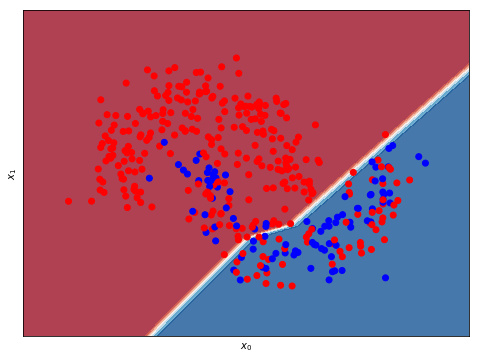

In [8]:
mp = MultilayerPerceptron(n_input=n_input,
                          n_classes=n_classes,
                          n_hiddens=[8, 8],
                          learning_rate=5e-2,
                          regularization=0,
                          training_epochs=100,
                          imbalanced=True,
                          verbose=True)
fit_plot(X_train, Y_train_pu.get(0.5), mp)

### Class weighted

('Using class_weight', array([ 1.        ,  6.46315789]))
('Epoch:', '0001', 'cost=', '1.045540482')
('Epoch:', '0006', 'cost=', '0.938760504')
('Epoch:', '0011', 'cost=', '0.912511811')
('Epoch:', '0016', 'cost=', '0.902277872')
('Epoch:', '0021', 'cost=', '0.897064388')
('Epoch:', '0026', 'cost=', '0.890887350')
('Epoch:', '0031', 'cost=', '0.883163646')
('Epoch:', '0036', 'cost=', '0.871918529')
('Epoch:', '0041', 'cost=', '0.860321343')
('Epoch:', '0046', 'cost=', '0.851313904')
('Epoch:', '0051', 'cost=', '0.845717043')
('Epoch:', '0056', 'cost=', '0.841564953')
('Epoch:', '0061', 'cost=', '0.838853851')
('Epoch:', '0066', 'cost=', '0.836612955')
('Epoch:', '0071', 'cost=', '0.835233852')
('Epoch:', '0076', 'cost=', '0.834162027')
('Epoch:', '0081', 'cost=', '0.833820000')
('Epoch:', '0086', 'cost=', '0.833286226')
('Epoch:', '0091', 'cost=', '0.832843542')
('Epoch:', '0096', 'cost=', '0.831853256')


<module 'matplotlib.pyplot' from '/usr/local/lib/python2.7/dist-packages/matplotlib/pyplot.pyc'>

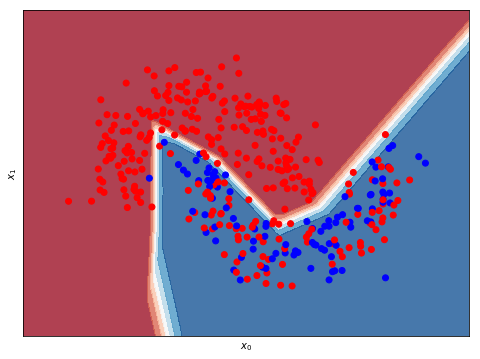

In [9]:
mp = MultilayerPerceptron(n_input=n_input,
                          n_classes=n_classes,
                          n_hiddens=[8, 8],
                          learning_rate=1e-2,
                          regularization=0,
                          training_epochs=100,
                          class_weight=[.5, 1],
                          imbalanced=True,
                          verbose=True)
fit_plot(X_train, Y_train_pu.get(0.5), mp)

('Using class_weight', array([  1.        ,  49.32432432]))
('Epoch:', '0001', 'cost=', '1.722984761')
('Epoch:', '0006', 'cost=', '1.646999210')
('Epoch:', '0011', 'cost=', '1.614059776')
('Epoch:', '0016', 'cost=', '1.561296046')
('Epoch:', '0021', 'cost=', '1.506023079')
('Epoch:', '0026', 'cost=', '1.483983219')
('Epoch:', '0031', 'cost=', '1.473121494')
('Epoch:', '0036', 'cost=', '1.465980798')
('Epoch:', '0041', 'cost=', '1.461563826')
('Epoch:', '0046', 'cost=', '1.459180087')
('Epoch:', '0051', 'cost=', '1.454788506')
('Epoch:', '0056', 'cost=', '1.453615993')
('Epoch:', '0061', 'cost=', '1.453671694')
('Epoch:', '0066', 'cost=', '1.443541974')
('Epoch:', '0071', 'cost=', '1.433338612')
('Epoch:', '0076', 'cost=', '1.431957185')
('Epoch:', '0081', 'cost=', '1.417736143')
('Epoch:', '0086', 'cost=', '1.413041741')
('Epoch:', '0091', 'cost=', '1.411740541')
('Epoch:', '0096', 'cost=', '1.409945965')


<module 'matplotlib.pyplot' from '/usr/local/lib/python2.7/dist-packages/matplotlib/pyplot.pyc'>

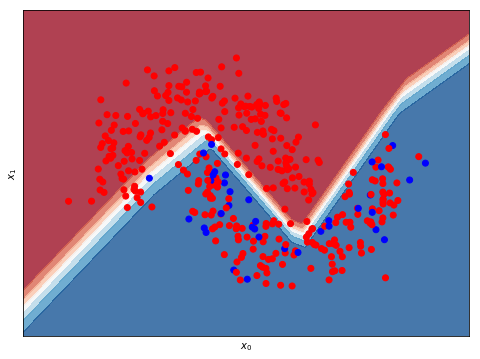

In [15]:
mp = MultilayerPerceptron(n_input=n_input,
                          n_classes=n_classes,
                          n_hiddens=[8, 8],
                          learning_rate=1e-2,
                          regularization=0,
                          training_epochs=100,
                          class_weight=[.2, 1],
                          imbalanced=True,
                          verbose=True)
fit_plot(X_train, Y_train_pu.get(0.8), mp)

### Class dependent loss

('Using class_weight', array([  1.        ,  49.32432432]))
('Epoch:', '0001', 'cost=', '1.225291386')
('Epoch:', '0006', 'cost=', '1.065156072')
('Epoch:', '0011', 'cost=', '1.034058407')
('Epoch:', '0016', 'cost=', '1.037152097')
('Epoch:', '0021', 'cost=', '1.028578907')
('Epoch:', '0026', 'cost=', '1.030455142')
('Epoch:', '0031', 'cost=', '1.027808249')
('Epoch:', '0036', 'cost=', '1.026909798')
('Epoch:', '0041', 'cost=', '1.018745825')
('Epoch:', '0046', 'cost=', '1.031809598')
('Epoch:', '0051', 'cost=', '1.018644035')
('Epoch:', '0056', 'cost=', '1.019399926')
('Epoch:', '0061', 'cost=', '1.025173306')
('Epoch:', '0066', 'cost=', '1.015540406')
('Epoch:', '0071', 'cost=', '1.009088039')
('Epoch:', '0076', 'cost=', '1.014208108')
('Epoch:', '0081', 'cost=', '0.995038927')
('Epoch:', '0086', 'cost=', '0.985578075')
('Epoch:', '0091', 'cost=', '0.981311589')
('Epoch:', '0096', 'cost=', '0.978385448')
('Epoch:', '0101', 'cost=', '0.976586670')
('Epoch:', '0106', 'cost=', '0.975424

<module 'matplotlib.pyplot' from '/usr/local/lib/python2.7/dist-packages/matplotlib/pyplot.pyc'>

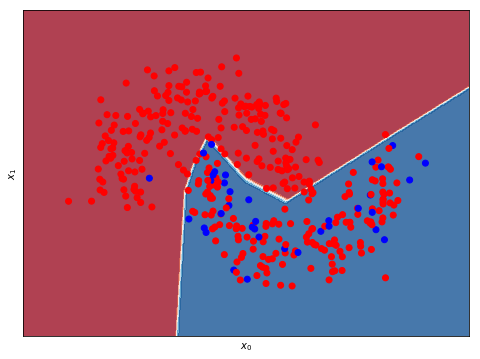

In [18]:
cdmp = ClassDepLossMultilayerPerceptron(n_input=n_input,
                          n_classes=n_classes,
                          n_hiddens=[8, 8],
                          learning_rate=5e-2,
                          regularization=0,
                          training_epochs=200,
                          class_weight=[0.2, 1],
                          imbalanced=True,
                          verbose=True)
fit_plot(X_train, Y_train_pu.get(0.8), cdmp)

('Using class_weight', array([ 1.        ,  3.23157895]))
('Epoch:', '0001', 'cost=', '1.515203446')
('Epoch:', '0006', 'cost=', '1.459547341')
('Epoch:', '0011', 'cost=', '1.407283574')
('Epoch:', '0016', 'cost=', '1.309375048')
('Epoch:', '0021', 'cost=', '1.283206731')
('Epoch:', '0026', 'cost=', '1.265274942')
('Epoch:', '0031', 'cost=', '1.250581890')
('Epoch:', '0036', 'cost=', '1.240416944')
('Epoch:', '0041', 'cost=', '1.233022273')
('Epoch:', '0046', 'cost=', '1.227085650')
('Epoch:', '0051', 'cost=', '1.223085105')
('Epoch:', '0056', 'cost=', '1.220208794')
('Epoch:', '0061', 'cost=', '1.216259032')
('Epoch:', '0066', 'cost=', '1.212506920')
('Epoch:', '0071', 'cost=', '1.208400160')
('Epoch:', '0076', 'cost=', '1.205497175')
('Epoch:', '0081', 'cost=', '1.201376498')
('Epoch:', '0086', 'cost=', '1.197369665')
('Epoch:', '0091', 'cost=', '1.195034027')
('Epoch:', '0096', 'cost=', '1.193697155')


<module 'matplotlib.pyplot' from '/usr/local/lib/python2.7/dist-packages/matplotlib/pyplot.pyc'>

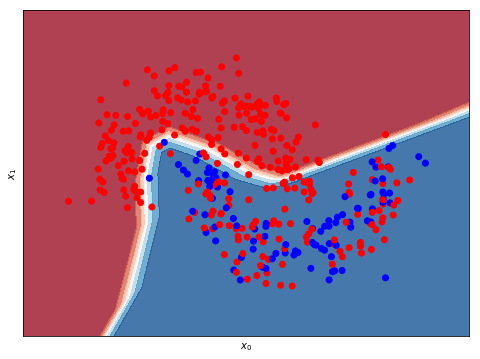

In [4]:
Y_train_pu = get_PU_labels(Y_train, random_seed=42)
hbmp = HardBoostrappingMultilayerPerceptron(n_input=n_input,
                          n_classes=n_classes,
                          n_hiddens=[8, 8],
                          learning_rate=5e-3,
                          regularization=0,
                          training_epochs=100,
                          class_weight=None,
                          betas=[0.5, 1],
                          imbalanced=True,
                          verbose=True)
fit_plot(X_train, Y_train_pu.get(0.5), hbmp)

## The effect of unlabelled example weight

In [ ]:
n_input = 2
n_classes = 2


n_iters = 10

args_list = []
for it in range(n_iters):
    
    X, y = datasets.make_moons(n_samples=800, noise=0.2)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.5, random_state=42)
    Y_train = np.eye(n_classes)[y_train]
    Y_train_pu = get_PU_labels(Y_train, random_seed=42, verbose=False)
    
    for pct_missing in Y_train_pu.keys():
        for w_unl in np.arange(0.1, 1.01, 0.1):
            for clsf in ['mlp', 'hardb_mlp', 'clsdep_mlp']:
                data = {}
                data["X_train"] = X_train
                data["Y_train"] = Y_train_pu[pct_missing]
                data["X_test"] = X_test
                data["y_test"] = y_test
                data["pct_missing"] = pct_missing
                data["clsf"] = clsf
                data["w_unlabelled"] = w_unl
                args_list.append(data)

def fit_classifier(args):
    pct_missing = args['pct_missing']
    w_unlabelled = args['w_unlabelled']
    
    X_train = args["X_train"]
    Y_train = args["Y_train"]
    X_test = args["X_test"]
    y_test = args["y_test"]
    
    clsf = args["clsf"]
    if clsf == 'mlp':
        classifier = MultilayerPerceptron(n_input=n_input,
              n_classes=n_classes,
              n_hiddens=[8, 8],
              learning_rate=5e-2,
              regularization=0,
              training_epochs=100,
              class_weight=[w_unlabelled, 1],
              imbalanced=True,
              verbose=False)
    elif clsf == 'hardb_mlp':
        classifier = HardBoostrappingMultilayerPerceptron(n_input=n_input,
              n_classes=n_classes,
              n_hiddens=[8, 8],
              learning_rate=5e-3,
              regularization=0,
              training_epochs=100,
              class_weight=None,
              betas=[w_unlabelled, 1],
              imbalanced=True,
              verbose=False)
    elif clsf == 'clsdep_mlp':
        classifier = ClassDepLossMultilayerPerceptron(n_input=n_input,
              n_classes=n_classes,
              n_hiddens=[8, 8],
              learning_rate=5e-2,
              regularization=0,
              training_epochs=200,
              class_weight=[w_unlabelled, 1],
              imbalanced=True,
              verbose=False)
    print("Fitting:", clsf, "Missing:", pct_missing, "Unlabelled weight:", w_unlabelled)
    classifier.fit(X_train, Y_train)
    y_pred = classifier.predict(X_test)
    auc = metrics.roc_auc_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    acc = metrics.accuracy_score(y_test, y_pred)
    print("Got", "AUC:", auc, "F1-score:", f1, "Accuracy:", acc)
    record = {}
    record['%missing'] = pct_missing
    record['w_unlabelled'] = w_unlabelled
    record["classifier"] = clsf
    record['AUC'] = auc
    record['F1-score'] = f1
    record['Accuracy'] = acc
    return record

from multiprocessing import Pool
pool = Pool(processes=6)
acc_grid_list = pool.map(fit_classifier, args_list)

('Fitting:', 'mlp', 'Missing:', 1.0, 'Unlabelled weight:', 0.70000000000000007)
('Fitting:', 'mlp', 'Missing:', 0.0, 'Unlabelled weight:', 0.10000000000000001)
('Fitting:', 'mlp', 'Missing:', 0.5, 'Unlabelled weight:', 0.10000000000000001)
('Fitting:', 'mlp', 'Missing:', 0.30000000000000004, 'Unlabelled weight:', 0.5)
('Fitting:', 'mlp', 'Missing:', 0.90000000000000002, 'Unlabelled weight:', 0.30000000000000004)
('Fitting:', 'mlp', 'Missing:', 0.20000000000000001, 'Unlabelled weight:', 0.90000000000000002)
('Got', 'AUC:', 0.84913965586234497, 'F1-score:', 0.84042553191489355, 'Accuracy:', 0.84999999999999998)
('Fitting:', 'hardb_mlp', 'Missing:', 0.90000000000000002, 'Unlabelled weight:', 0.30000000000000004)
('Got', 'AUC:', 0.96041437293564214, 'F1-score:', 0.95939086294416243, 'Accuracy:', 0.95999999999999996)
('Fitting:', 'hardb_mlp', 'Missing:', 0.20000000000000001, 'Unlabelled weight:', 0.90000000000000002)


/usr/local/lib/python2.7/dist-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


('Got', 'AUC:', 0.5, 'F1-score:', 0.0, 'Accuracy:', 0.51000000000000001)
('Got', 'AUC:', 0.83548419367747107, 'F1-score:', 0.85209713024282574, 'Accuracy:', 0.83250000000000002)
('Got', 'AUC:', 0.84651186067460704, 'F1-score:', 0.84878048780487803, 'Accuracy:', 0.84499999999999997)
('Fitting:', 'hardb_mlp', 'Missing:', 1.0, 'Unlabelled weight:', 0.70000000000000007)
('Fitting:', 'hardb_mlp', 'Missing:', 0.0, 'Unlabelled weight:', 0.10000000000000001)
('Fitting:', 'hardb_mlp', 'Missing:', 0.5, 'Unlabelled weight:', 0.10000000000000001)
('Got', 'AUC:', 0.86683014713241924, 'F1-score:', 0.86956521739130455, 'Accuracy:', 0.86499999999999999)
('Fitting:', 'hardb_mlp', 'Missing:', 0.30000000000000004, 'Unlabelled weight:', 0.5)
('Got', 'AUC:', 0.86869747899159666, 'F1-score:', 0.87290167865707424, 'Accuracy:', 0.86750000000000005)
('Fitting:', 'clsdep_mlp', 'Missing:', 0.90000000000000002, 'Unlabelled weight:', 0.30000000000000004)
('Got', 'AUC:', 0.87608847963166847, 'F1-score:', 0.87623762

In [5]:
import pandas as pd
acc_grid = pd.DataFrame(acc_grid_list)
acc_grid.to_csv("weighted_unlabelled_moons.csv")

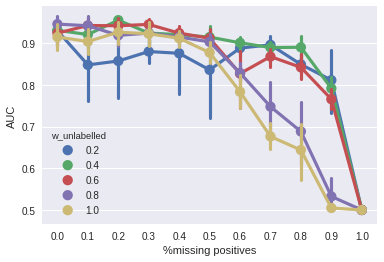

In [7]:
import seaborn as sns
%matplotlib inline
f, ax = plt.subplots(1)


sns.pointplot(x='%missing', y='AUC', hue='w_unlabelled', data=acc_grid[acc_grid['w_unlabelled'].isin([0.2, 0.4, 0.6, 0.8, 1.0])], ax=ax)
ax.set_xlabel('%missing positives')
ax.set_ylabel('AUC')